In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib 
import numpy as np
import scipy.stats
from pivottablejs import pivot_ui
from scipy.stats import chi2_contingency

# Enable inline plotting
%matplotlib inline


In [2]:
#goal: look at decision making, knowledge of UN, peace building contributions
#disagg by age, gender, location and caste

In [18]:
s./Users/ewanog/Dropbox/Work/UNV/Analysis/Peace Piece/survey.xlsx', sheetname='raw', header = 0, keep_default_na=False)

In [4]:
df['7b. Others: '].value_counts()

                                 1336
Muslim                             28
Christian                           2
                                    2
Thakuri                             2
Mardwari                            1
Mandal                              1
Giri                                1
Janajati                            1
Oil selling or business group       1
Podar                               1
Yadav                               1
Name: 7b. Others: , dtype: int64

In [19]:
#clean

# df = df.replace('', np.nan, regex=True)

#Rename columns
df = df.rename(columns = {'6.AGE' : 'age', "4. Gender" : 'gender', '2. Urban or rural' : 'location',
                          '7B. Ethnicity/indigenous group - Categorize' :  'group'})
    
#Age
df['age'] = pd.to_numeric(df['age'])

# v = df['6.AGE']
# print(len([i for i in v.values if i in [18,19,20]]))
# print(len([i for i in v.values if i in [21,22,23,24]]))
# print(len([i for i in v.values if i in [25,26,27,28,29,30]]))

def mb(x):
    if x in [18,19,20]:
        return '18-21'
    elif x in [21,22,23,24]:
        return '21-24' 
    elif x in [25,26,27,28,29,30]:
        return '25-30'
    else:
        return None

df['age'] = df['age'].apply(lambda x: mb(x))

In [20]:
#figure out question groups

pd.DataFrame(df.columns).to_clipboard(excel=True, sep=';')

qdiv = [(56,"dec"),
(58,"dec"),
(59,"decresp"),
(78,"dec"),
(79,"decresp"),
(94,"dec"),
(95,"dec"),
(96,"decresp"),
(102,"decresp"),
(108,"dec"),
(112,"decresp"),
(121,"dec"),
(122,"dec"),
(123,"dec"),
(124,"dec"),
(127,"decresp"),
(134,"dec"),
(138,"pc"),
(163,"dec"),
(171,"pc"),
(185,"un")]

qs = {}

qs['dec'] = [v[0] for v in qdiv if v[1] == 'dec']
qs['decresp'] = [v[0] for v in qdiv if v[1] == 'decresp']
qs['pc'] = [v[0] for v in qdiv if v[1] == 'pc']
qs['un'] = [v[0] for v in qdiv if v[1] == 'un']

agg = ['age', 'gender', 'location']

In [21]:
#decision
#agg, qs

qs['dec']

#30s are a continuation of: 30.What are the top two challenges you face while making decisions?


l = {}
for a in agg:
    t = []
    for p in qs['decresp'] + qs['dec']:
        t.append(chi2_contingency(pd.crosstab(df[a], df[df.columns[p]]))[1] < 0.05)
    l[a] = t
        
for k in l.items():
    print(k[1])
    
for k in qs['decresp'] + qs['dec']:
    print(df.columns[k])


[False, True, True, False, True, False, True, True, False, True, False, False, False, False, False, True, True, False]
[False, False, False, False, True, True, True, False, False, False, False, True, False, False, False, False, True, False]
[True, True, False, False, True, False, True, True, True, True, False, True, True, True, False, False, False, False]
18.If no, why? 
21. If yes, what kind of decision making discussion do you lead or participate in?
26.If yes, why?
27.If no, why?
29. If yes, what kind of decisions do you make at community and/or national level?
31. If no, why?
16.Who makes the important decisions at your home? 
17.Do you participate in decision making at your home?
20.Do you think you should have a role in making decisions in your family? 
24. Do you make decisions in your group/club/organization/committee?
25. Do you want to get involved in decision-making process in your group/club? 
28.Do you participate in decision making at the community level and/or national l

In [9]:
#peace
qs['pc']

for a in agg:
    t = []
    for p in qs['pc']:
        t.append(chi2_contingency(pd.crosstab(df[a], df[df.columns[p]]))[1] < 0.05)
    l[a] = t
        
for k in l.items():
    print(k[1])
    
for k in qs['pc']:
    print(df.columns[k])

[True, False]
[True, False]
[False, False]
33.Are you involved in any activities for promoting peace & development in Nepal?
40. Who do you think are the key actors of peace and sustainable development in Nepal


In [10]:
#UN

for a in agg:
    t = []
    for p in qs['un']:
        t.append(chi2_contingency(pd.crosstab(df[a], df[df.columns[p]]))[1] < 0.05)
    l[a] = t
        
for k in l.items():
    print(k[1])
    
for k in qs['un']:
    print(df.columns[k])

[True]
[True]
[False]
41. What can the UN do to promote/increase youth participation in the Peace and Sustainable Development of Nepal?


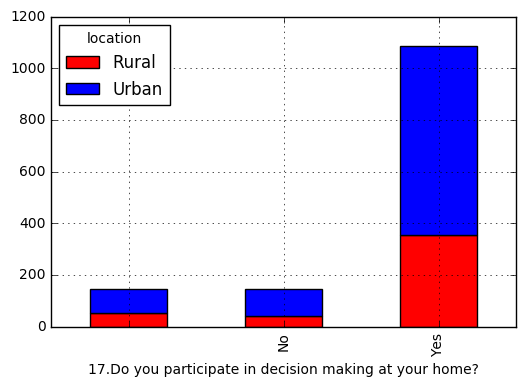

In [11]:
#age corr sample graph
#17.Do you participate in decision making at your home?



ct = pd.crosstab(df['17.Do you participate in decision making at your home?'], df['location'])

ct.plot(kind='bar', stacked=True, color=['red','blue','green'], grid=True)
